In [3]:
import matplotlib.pyplot as plt
import json

In [19]:
dictionary = json.load(open('data.json', 'r'))
with open('data.json', 'w') as f:
    f.write(json.dumps(dictionary, indent=4))

In [57]:
dictionary = json.load(open('data.json', 'r'))["data"]
xAxis = [item['time'].split(' ')[-1] for item in dictionary]
yIlluminance = [int(item['illuminance']) for item in dictionary]
yVin = [float(item['Vin']) for item in dictionary]
yCO2 = [int(item['CO2']) for item in dictionary]
#  перевод показателей в целочисленное значение
xAxis = [sum([int(el.split(':')[::-1][n])*60**n for n in range(3)]) for el in xAxis]
base_t = xAxis[0]
xAxis = xAxis[100:]
yCO2 = yCO2[100:]
xAxis = [el % base_t for el in xAxis]

In [65]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()

    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

def histogram(data, n_bins, x_label = "", y_label = "", title = "", cumulative=False):
    _, ax = plt.subplots()
    ax.hist(data, bins=n_bins, cumulative=cumulative, color='#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

def circular(values, labels):
    _, ax = plt.subplots()
    ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
    ax.axis("equal")

In [75]:
groups = {'Рабочее напряжение (23.0>=)': len([el for el in yVin if el >= 23.0 ]), 'Ниже нормы (23.0<)': len(([el for el in yVin if el < 23.0 ]))}

In [69]:
groups.values()

dict_values([1014, 64])

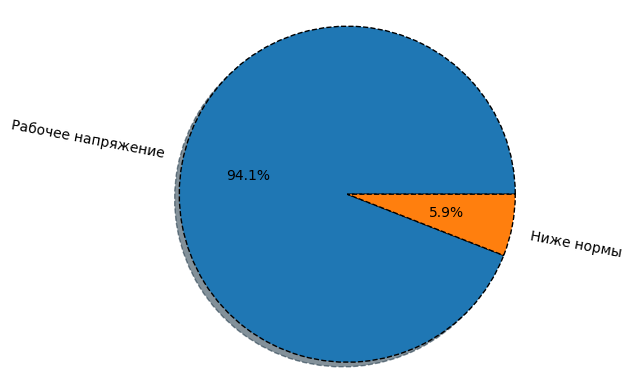

In [76]:
circular(groups.values(), groups.keys())

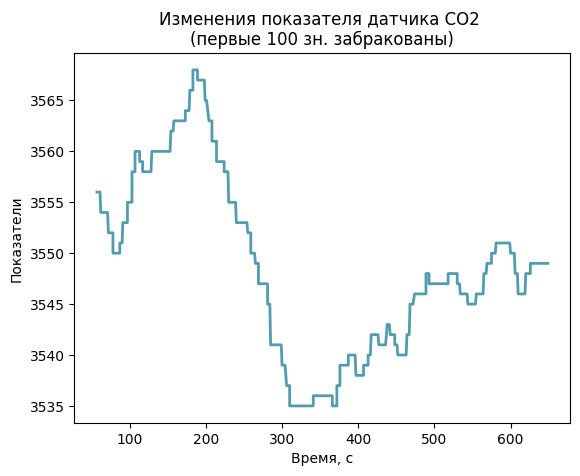

In [58]:
lineplot(xAxis, yCO2, 'Время, c', "Показатели", "Изменения показателя датчика СО2 \n(первые 100 зн. забракованы)")

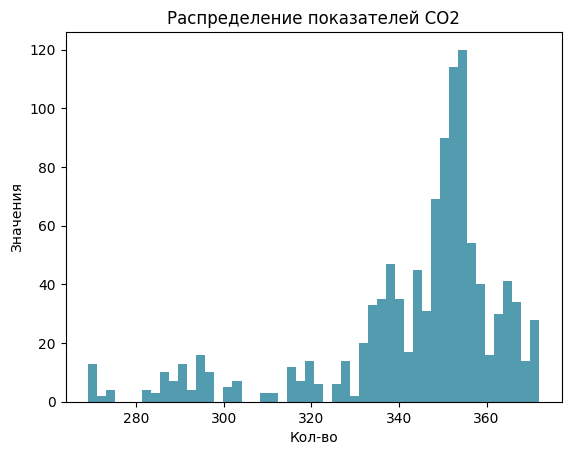

In [46]:
histogram(yIlluminance, 50, 'Кол-во', 'Значения', 'Распределение показателей СО2')